Selected file: C:\Users\afroz\Desktop\PICKLEFILE\GW230529.hdf5


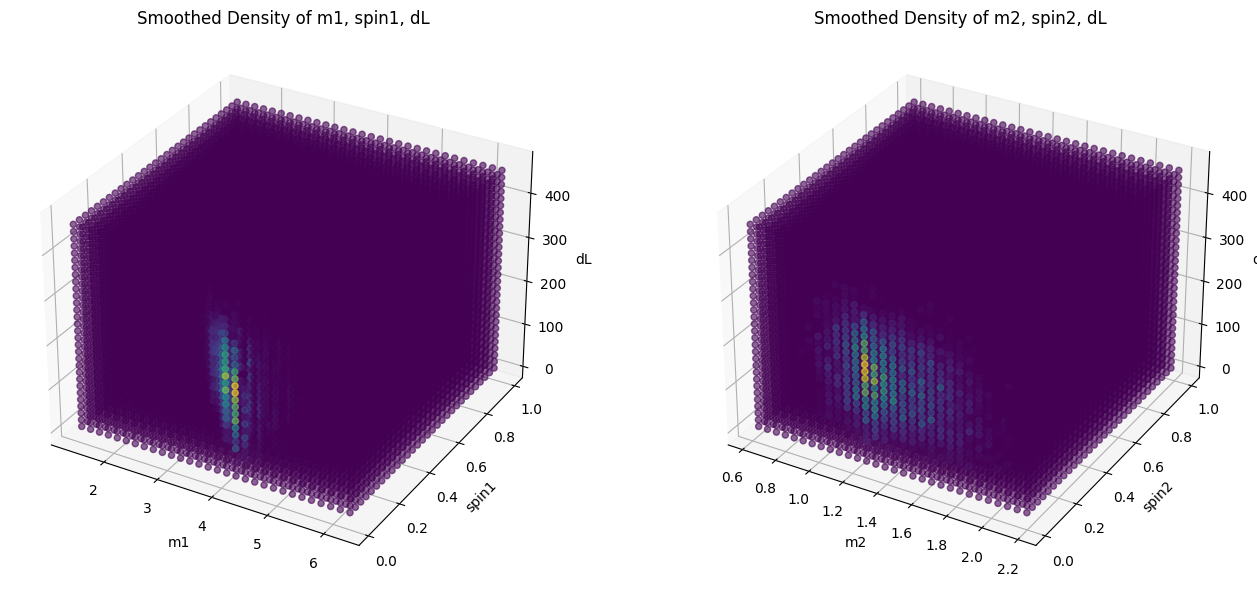

In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D

# Directory and event
directory = r'C:\Users\afroz\Desktop\PICKLEFILE'
event_name = "GW230529.hdf5"

# Check if the file exists
file_path = os.path.join(directory, event_name)
if os.path.exists(file_path):
    print(f"Selected file: {file_path}")
else:
    raise FileNotFoundError(f"{event_name} not found in {directory}")

# Load posterior samples
with h5py.File(file_path, 'r') as f:
    group_name = list(f.keys())[0]
    group = f[group_name]
    samples = group['posterior_samples']

    m1_samples = samples['mass_1_source'][:]
    m2_samples = samples['mass_2_source'][:]
    dL_samples = samples['luminosity_distance'][:]

    s1_samples = np.sqrt(samples['spin_1x'][:]**2 + samples['spin_1y'][:]**2 + samples['spin_1z'][:]**2)
    s2_samples = np.sqrt(samples['spin_2x'][:]**2 + samples['spin_2y'][:]**2 + samples['spin_2z'][:]**2)

# Compute mean and std dev for mass and distance
m1_mean, m1_std = np.mean(m1_samples), np.std(m1_samples)
m2_mean, m2_std = np.mean(m2_samples), np.std(m2_samples)
dL_mean, dL_std = np.mean(dL_samples), np.std(dL_samples)

# Ranges: mean ± 4 sigma (clip at zero)
m1_range = [max(0, m1_mean - 4*m1_std), m1_mean + 4*m1_std]
m2_range = [max(0, m2_mean - 4*m2_std), m2_mean + 4*m2_std]
dL_range = [max(0, dL_mean - 4*dL_std), dL_mean + 4*dL_std]
spin_range = [0.0, 1.0]

# 3D histograms
hist_bins = [40, 40, 40]  # mass, spin, dL
H1, edges1 = np.histogramdd(np.column_stack([m1_samples, s1_samples, dL_samples]),
                            bins=hist_bins,
                            range=[m1_range, spin_range, dL_range],
                            density=True)
H2, edges2 = np.histogramdd(np.column_stack([m2_samples, s2_samples, dL_samples]),
                            bins=hist_bins,
                            range=[m2_range, spin_range, dL_range],
                            density=True)

# Bin centers
xcenters1 = 0.5 * (edges1[0][:-1] + edges1[0][1:])
ycenters1 = 0.5 * (edges1[1][:-1] + edges1[1][1:])
zcenters1 = 0.5 * (edges1[2][:-1] + edges1[2][1:])

xcenters2 = 0.5 * (edges2[0][:-1] + edges2[0][1:])
ycenters2 = 0.5 * (edges2[1][:-1] + edges2[1][1:])
zcenters2 = 0.5 * (edges2[2][:-1] + edges2[2][1:])

# Interpolators with extrapolation
interp_func1 = RegularGridInterpolator((xcenters1, ycenters1, zcenters1), H1, bounds_error=False, fill_value=None)
interp_func2 = RegularGridInterpolator((xcenters2, ycenters2, zcenters2), H2, bounds_error=False, fill_value=None)

# Fine grids for smooth plotting
mass_fine_1 = np.linspace(xcenters1[0], xcenters1[-1], 30)
spin_fine_1 = np.linspace(ycenters1[0], ycenters1[-1], 30)
dL_fine_1 = np.linspace(zcenters1[0], zcenters1[-1], 30)
mass_grid_1, spin_grid_1, dL_grid_1 = np.meshgrid(mass_fine_1, spin_fine_1, dL_fine_1, indexing='ij')
points_1 = np.column_stack([mass_grid_1.ravel(), spin_grid_1.ravel(), dL_grid_1.ravel()])
H1_smooth = interp_func1(points_1).reshape(mass_grid_1.shape)

mass_fine_2 = np.linspace(xcenters2[0], xcenters2[-1], 30)
spin_fine_2 = np.linspace(ycenters2[0], ycenters2[-1], 30)
dL_fine_2 = np.linspace(zcenters2[0], zcenters2[-1], 30)
mass_grid_2, spin_grid_2, dL_grid_2 = np.meshgrid(mass_fine_2, spin_fine_2, dL_fine_2, indexing='ij')
points_2 = np.column_stack([mass_grid_2.ravel(), spin_grid_2.ravel(), dL_grid_2.ravel()])
H2_smooth = interp_func2(points_2).reshape(mass_grid_2.shape)

# Quick 3D plotting example (scatter plot with transparency)
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(mass_grid_1.ravel(), spin_grid_1.ravel(), dL_grid_1.ravel(), c=H1_smooth.ravel(), cmap='viridis', alpha=0.6)
ax1.set_xlabel('m1')
ax1.set_ylabel('spin1')
ax1.set_zlabel('dL')
ax1.set_title('Smoothed Density of m1, spin1, dL')

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(mass_grid_2.ravel(), spin_grid_2.ravel(), dL_grid_2.ravel(), c=H2_smooth.ravel(), cmap='viridis', alpha=0.6)
ax2.set_xlabel('m2')
ax2.set_ylabel('spin2')
ax2.set_zlabel('dL')
ax2.set_title('Smoothed Density of m2, spin2, dL')

plt.tight_layout()
plt.show()


Selected file: C:\Users\afroz\Desktop\PICKLEFILE\GW230529.hdf5
0.16480993351445483
0.5887512706842452


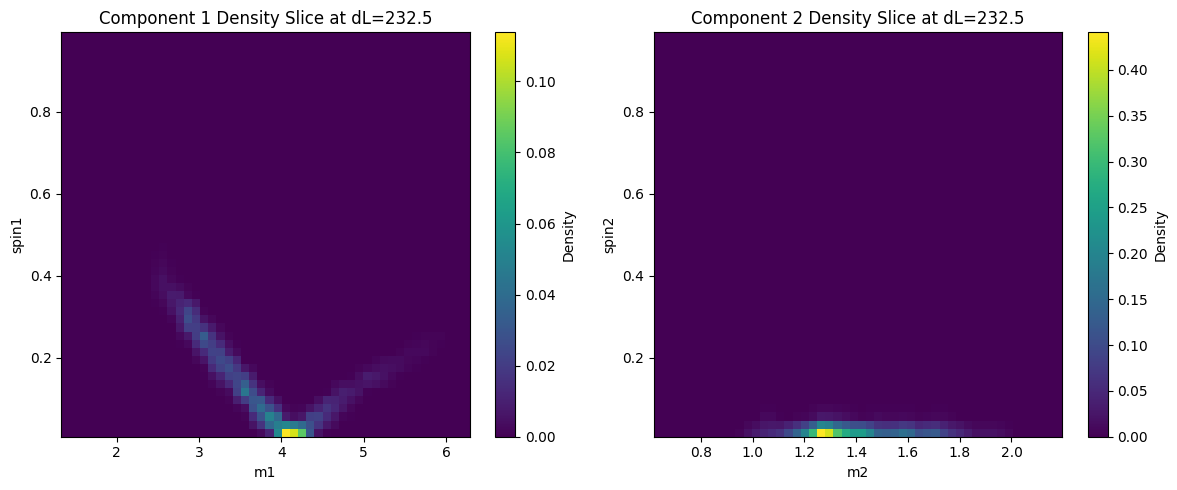

In [5]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
import pickle

# -----------------------------
# 1. File and directory setup
# -----------------------------
directory = r'C:\Users\afroz\Desktop\PICKLEFILE'
event_name = "GW230529.hdf5"
file_path = os.path.join(directory, event_name)

if os.path.exists(file_path):
    print(f"Selected file: {file_path}")
else:
    raise FileNotFoundError(f"{event_name} not found in {directory}")

# -----------------------------
# 2. Load posterior samples
# -----------------------------
with h5py.File(file_path, 'r') as f:
    group_name = list(f.keys())[0]
    group = f[group_name]
    samples = group['posterior_samples']

    m1_samples = samples['mass_1_source'][:]
    m2_samples = samples['mass_2_source'][:]

    s1_samples = np.sqrt(samples['spin_1x'][:]**2 + samples['spin_1y'][:]**2 + samples['spin_1z'][:]**2)
    s2_samples = np.sqrt(samples['spin_2x'][:]**2 + samples['spin_2y'][:]**2 + samples['spin_2z'][:]**2)

    dL_samples = samples['luminosity_distance'][:]

# -----------------------------
# 3. Compute mean ± 4σ ranges
# -----------------------------
def mean_std_range(samples):
    mean = np.mean(samples)
    std = np.std(samples)
    return max(0, mean - 4*std), mean + 4*std

m1_range = mean_std_range(m1_samples)
m2_range = mean_std_range(m2_samples)
spin_range = [0.0, 1.0]
dL_range = mean_std_range(dL_samples)

# -----------------------------
# 4. 3D histograms
# -----------------------------
hist_bins = [30, 30, 30]  # mass, spin, dL

H1, edges1 = np.histogramdd(np.column_stack([m1_samples, s1_samples, dL_samples]),
                            bins=hist_bins, range=[m1_range, spin_range, dL_range], density=True)
H2, edges2 = np.histogramdd(np.column_stack([m2_samples, s2_samples, dL_samples]),
                            bins=hist_bins, range=[m2_range, spin_range, dL_range], density=True)

# -----------------------------
# 5. Bin centers
# -----------------------------
xcenters1 = 0.5 * (edges1[0][:-1] + edges1[0][1:])
ycenters1 = 0.5 * (edges1[1][:-1] + edges1[1][1:])
zcenters1 = 0.5 * (edges1[2][:-1] + edges1[2][1:])

xcenters2 = 0.5 * (edges2[0][:-1] + edges2[0][1:])
ycenters2 = 0.5 * (edges2[1][:-1] + edges2[1][1:])
zcenters2 = 0.5 * (edges2[2][:-1] + edges2[2][1:])

# -----------------------------
# 6. Interpolators
# -----------------------------
Comp1_3D = RegularGridInterpolator((xcenters1, ycenters1, zcenters1), H1,
                                   bounds_error=False, fill_value=None)
Comp2_3D = RegularGridInterpolator((xcenters2, ycenters2, zcenters2), H2,
                                   bounds_error=False, fill_value=None)

# -----------------------------
# 7. Save interpolators using pickle
# -----------------------------
with open(os.path.join(directory, f'{event_name}Comp1_3D.pkl'), 'wb') as f:
    pickle.dump(Comp1_3D, f)

with open(os.path.join(directory, f'{event_name}Comp2_3D.pkl'), 'wb') as f:
    pickle.dump(Comp2_3D, f)

# -----------------------------
# 8. Load interpolators
# -----------------------------
with open(os.path.join(directory, f'{event_name}Comp1_3D.pkl'), 'rb') as f:
    interp_comp1_3D_loaded = pickle.load(f)

with open(os.path.join(directory, f'{event_name}Comp2_3D.pkl'), 'rb') as f:
    interp_comp2_3D_loaded = pickle.load(f)

# -----------------------------
# 9. Define 3D functions
# -----------------------------
def density_comp1(mass, spin, dL):
    return interp_comp1_3D_loaded([[mass, spin, dL]])[0]

def density_comp2(mass, spin, dL):
    return interp_comp2_3D_loaded([[mass, spin, dL]])[0]

# -----------------------------
# 10. Test function at a point
# -----------------------------
print(density_comp1(4.1, 0.00, 232))
print(density_comp2(1.3, 0.00, 232))

# -----------------------------
# 11. Plot slices (mass vs spin for fixed dL)
# -----------------------------
dL_test = (dL_range[0] + dL_range[1])/2  # mid-distance slice

mass_fine_1 = np.linspace(xcenters1[0], xcenters1[-1], 50)
spin_fine_1 = np.linspace(ycenters1[0], ycenters1[-1], 50)
mass_grid_1, spin_grid_1 = np.meshgrid(mass_fine_1, spin_fine_1)
points_1 = np.column_stack([mass_grid_1.ravel(), spin_grid_1.ravel(), np.full(mass_grid_1.size, dL_test)])
H1_slice = interp_comp1_3D_loaded(points_1).reshape(mass_grid_1.shape)

mass_fine_2 = np.linspace(xcenters2[0], xcenters2[-1], 50)
spin_fine_2 = np.linspace(ycenters2[0], ycenters2[-1], 50)
mass_grid_2, spin_grid_2 = np.meshgrid(mass_fine_2, spin_fine_2)
points_2 = np.column_stack([mass_grid_2.ravel(), spin_grid_2.ravel(),np.full(mass_grid_2.size, dL_test)])
H2_slice = interp_comp2_3D_loaded(points_2).reshape(mass_grid_2.shape)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.pcolormesh(mass_grid_1, spin_grid_1, H1_slice, shading='auto')
plt.xlabel('m1')
plt.ylabel('spin1')
plt.title(f'Component 1 Density Slice at dL={dL_test:.1f}')
plt.colorbar(label='Density')

plt.subplot(1,2,2)
plt.pcolormesh(mass_grid_2, spin_grid_2, H2_slice, shading='auto')
plt.xlabel('m2')
plt.ylabel('spin2')
plt.title(f'Component 2 Density Slice at dL={dL_test:.1f}')
plt.colorbar(label='Density')

plt.tight_layout()
plt.show()
